In [1]:
%reload_ext autoreload
%autoreload 2

from lensbiases import bispectrumgenerallensing as bgl, bispectrumpb as bpb

import numpy as np

import matplotlib.pyplot as plt

#retina display
%config InlineBackend.figure_format = 'retina'
#resize figure size
plt.rcParams['figure.figsize'] = [3, 3]
#resize font size
plt.rcParams.update({'font.size': 10})
#resize legend font size
plt.rcParams['legend.fontsize'] = 5
#resize tick label font size
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
#resize axes label font size
plt.rcParams['axes.labelsize'] = 5
#resize axes title font size
plt.rcParams['axes.titlesize'] = 8
#inline
%matplotlib inline

In [2]:
#define cosmological parameters

H0 = 67
ombh2 = 0.022445
omch2 = 0.1212
h = H0/100
As = 2.1265e-09
ns = 0.96

In [3]:
BL = bgl.BispectrumLensing(H0 = H0, ombh2 = ombh2, omch2 = omch2, As = As, ns = ns)

Note: redshifts have been re-sorted (earliest first)


/Users/omard/Documents/projects/lensbiases/lensbiases/bispectrumgenerallensing.py:24: RuntimeWarning: divide by zero encountered in true_divide
  Wphiphiv = np.nan_to_num(-2*(self.chistar-self.chis)/(self.chistar*self.chis))


In [4]:
Lprimes = np.arange(1, 5000, 5)
PB = bpb.PostBorn(Lprimes = Lprimes, H0 = H0, ombh2 = ombh2, omch2 = omch2, As = As, ns = ns)

Note: redshifts have been re-sorted (earliest first)


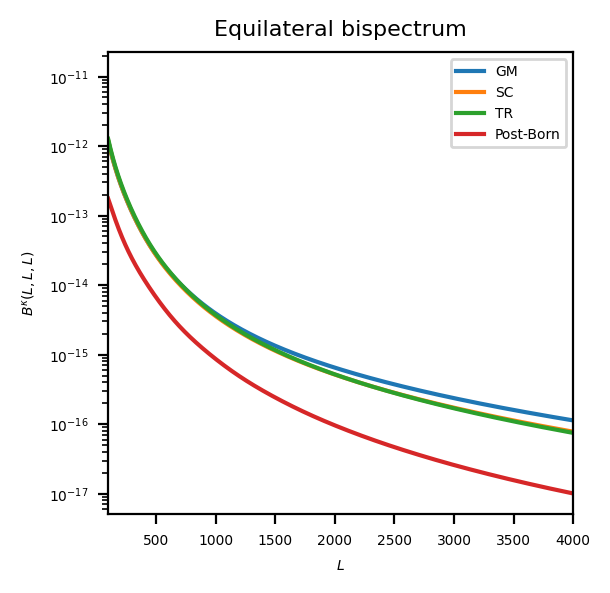

In [5]:
ls = np.arange(2, 4000, 1.)#note, it has to be float, for numerical accuracy!

plt.title("Equilateral bispectrum")
for model in BL.models:
    Bequi = BL.bispectrum_phi(ls, ls, ls, model = model)
    plt.plot(ls, Bequi*ls**6., label = model)

plt.plot(ls, PB.bispectrum_PB_phi(ls, ls, ls)*ls**6., label = "Post-Born")
    
plt.yscale("log")
plt.xlim(100, 4000)
plt.xlabel(r"$L$")
plt.ylabel(r"$B^{\kappa}(L, L, L)$")
plt.legend()
plt.show()

## Let's use these bispectra to compute the $N^{(3/2)}$ bias to a CMB lensing cross-correlation with true CMB lensing potential.

We will see how this can be done for QE, and the iterative estimators.